In [1]:
from pylab import *
from scipy.integrate import *
from numpy import *
%matplotlib inline
import random

In [2]:
def ec_mov(x_p,t,a=0):
    #x_p representa x, y,ypx, py; r32 representa r^(3/2)
    r32 = (x_p[0]**2 + x_p[1]**2)**(1.5)
    desv = 1. + a
    dx = x_p[2]*desv
    dy = x_p[3]
    dpx = -(x_p[0]*desv)/r32
    dpy = -(x_p[1]*desv)/r32
    return array([dx,dy,dpx,dpy])

In [3]:
def r_k4(ec,p_ini,x,args=0,h=0.01):
    if (x[1]-x[0]) <= 5.*h:
        h = (x[1]-x[0])/10
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i])
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    else:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i],args)
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h,args)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    return tiempos,sol

Odeint t4


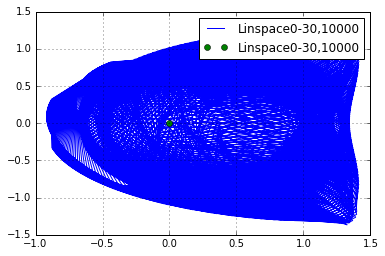

Runge-Kutta


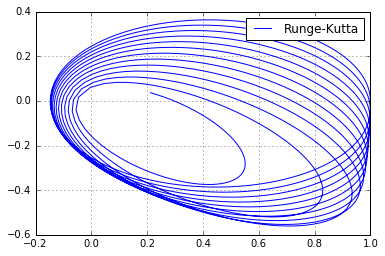

Odeint t1-t3


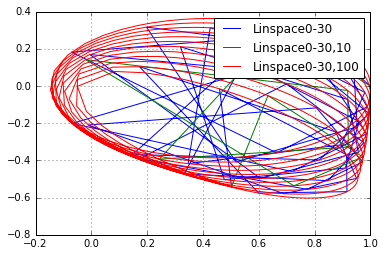

In [17]:
t,sol = r_k4(ec_mov,[1,0,0,0.5],[0,30],.05,0.01)
#########################################
t1=linspace(0,30)#10)#,1000)
t2=linspace(0,30,10)#,1000)
t3=linspace(0,30,1000)#,1000)
#Estamos jugano con este tiempo
t4=linspace(0,2*pi*500,5000)#,1000 2*pi*años
####################################
sol1 = odeint(ec_mov,[1,0,0,0.5],t1,args=(0.05,))
sol2 = odeint(ec_mov,[1,0,0,0.5],t2,args=(0.05,))
sol3 = odeint(ec_mov,[1,0,0,0.5],t3,args=(0.05,))
#Estamos jugando con esta
sol4 = odeint(ec_mov,[1,0,0,1],t4,args=(0.05,),rtol=1e-30)
#args=variable juega con el puedes quitarlo
####################################
print "Odeint t4"
plot(sol4[:,0],sol4[:,1], label="Linspace0-30,10000")
plot(sol4[-1,0],sol4[-1,1],"o",label="Linspace0-30,10000")
grid(True)
legend()
show()
####################################
print "Runge-Kutta"
grid(True)
plot(sol[:,0],sol[:,1],label="Runge-Kutta")
legend()
show()
#################################
# ylim([-1.5,1.5])
# xlim([-0.2,1])
####################################
grid(True)
print "Odeint t1-t3"
plot(sol1[:,0],sol1[:,1], label="Linspace0-30")
plot(sol2[:,0],sol2[:,1], label="Linspace0-30,10")
plot(sol3[:,0],sol3[:,1], label="Linspace0-30,100")
legend()
show()

In [5]:
def Energia(x_p,a):
    x,y,px,py = x_p[:,0],x_p[:,1],x_p[:,2],x_p[:,3]
    E = 0.5*(px*px *(1.+a)+py*py)-((1. +a)/sqrt(x**2 + y**2))
    return E

/home/est5/mis_programas/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in divide
  app.launch_new_instance()


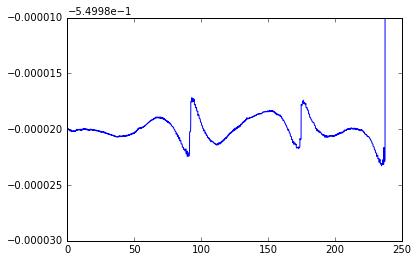

In [18]:
E = Energia(sol4,0.05)
ylim([E[0]-.00001,E[0]+.00001])
plot(t4/(2*pi),E)
show()

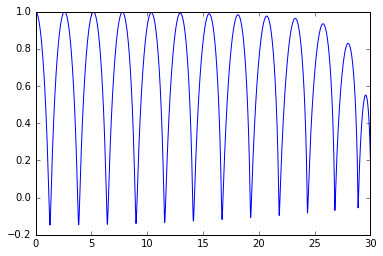

In [20]:
plot(t,sol[:,0])